**@oanavesa 02/09/2020**

**ASTR 621: Planetary System Formation
Homework 1: Minimum Mass Solar Nebula**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import matplotlib.cm as cm
import matplotlib
matplotlib.rcParams['text.usetex'] = True

1a) Take the semimajor axes and masses of the planets, plus the asteroid belt (2.8 AU, 4e-4 Mearth) and Kuiper belt (44 AU, 1.97e-2 Mearth).

In [2]:
# values taken from the email and Table 1 of 
# "Lecture Notes on the Formation and Early Evlution of Planetary Systems" by Philip J. Armitage

# semimajor axis (AU)
SA_asteroidbelt = 2.8
SA_kuiperbelt = 44
SA_mercury = 0.387
SA_venus = 0.723
SA_earth = 1
SA_mars = 1.524
SA_jupiter = 5.203
SA_saturn = 9.537
SA_uranus = 19.191
SA_neptune = 30.069

# Masses
Earth_Mass = 6e27 # g
M_asteroidbelt = 4e-4 *Earth_Mass
M_kuiperbelt = 1.97e-2 * Earth_Mass
M_mercury = (3.3e26)
M_venus = (4.9e27)
M_earth = Earth_Mass
M_mars = (6.4e26)
M_jupiter = (1.9e30)
M_saturn = (5.7e29)
M_uranus = (8.7e28)
M_neptune = (1e29)


1b) Spread the mass of the planet (or belt) around its orbit, with a zone extending half way to the orbit of the neighboring body. For Mercury and the KB, assume the zone extends equally on both sides.

In [3]:
def surface_density(scale,mass,a_body,a_body_to_left,a_body_to_right):
    '''This function calculates the surface density of a given body for the minimum mass solar nebula (MMSN).
    Assume Mercury and the Kuiper Belt have zones that extend equally on
    both sides (So, for Mercury, calculations would need to have Venus on both sides and
    for the Kuiper Belt, Neptune on both sides). See Class3 Notes.
    
    Input:
    scale = the factor that the mass needs to be multiplied with in order to reach Solar composition
    mass = mass of the body (g)
    a_body = semimajor axis of the body (AU)
    a_body_to_left = semimajor axis of the body located to the left (AU)
    a_body_to_right = semimajor axis of the body located to the right (AU)
    
    
    Output:
    surface_density = surface density of the given planet (g/cm^2) 
    area = area of which the body covers (cm^2) - used in a later definition'''
    
    if a_body==SA_mercury or a_body==SA_kuiperbelt:
        annuli_half_boundary_1 = (a_body_to_right - a_body)/2 # AU
        annuli_half_boundary_2 = (a_body_to_right - a_body)/2 # AU
        
    else:
        annuli_half_boundary_1 = (a_body - a_body_to_left)/2 # AU
        annuli_half_boundary_2 = (a_body_to_right - a_body)/2 # AU
        
    annuli_to_left = (a_body - annuli_half_boundary_1) # AU
    annuli_to_right =  (a_body + annuli_half_boundary_2) # AU
    change_in_a = annuli_to_right - annuli_to_left # AU
    conversion_of_change_in_a = change_in_a*1.496e+13 # cm 1 AU = 1.496e+13 cm
    conversion_of_a_body = a_body*1.496e+13 # cm 1 AU = 1.496e+13 cm
    
    area = 2*np.pi*conversion_of_a_body*conversion_of_change_in_a
    surface_density = (scale*mass)/area
    return surface_density, area
        
    

In [4]:
MM_mercury,area_mercury = surface_density(1,M_mercury, SA_mercury, SA_venus,SA_venus)
MM_venus,area_venus = surface_density(1,M_venus, SA_venus, SA_mercury, SA_earth)
MM_earth,area_earth = surface_density(1,M_earth, SA_earth, SA_venus, SA_mars)
MM_mars,area_mars = surface_density(1,M_mars,SA_mars,SA_earth,SA_asteroidbelt)
MM_asteriod,area_asteroid = surface_density(1,M_asteroidbelt,SA_asteroidbelt, SA_mars, SA_jupiter)
MM_jupiter,area_jupiter = surface_density(1,M_jupiter,SA_jupiter,SA_asteroidbelt,SA_saturn)
MM_saturn,area_saturn = surface_density(1,M_saturn,SA_saturn,SA_jupiter,SA_uranus)
MM_uranus,area_uranus = surface_density(1,M_uranus,SA_uranus,SA_saturn, SA_neptune)
MM_neptune,area_neptune = surface_density(1,M_neptune,SA_neptune,SA_uranus,SA_kuiperbelt)
# by the way I placed the variables, the area comes out negative but is still correct;
# add an abs() around MM_kuiperbelt
MM_kuiperbelt,area_kuiperbelt = surface_density(1,M_kuiperbelt, SA_kuiperbelt, SA_neptune, SA_neptune)

1c) Plot the resulting surface densities. Is there any obvious trend?

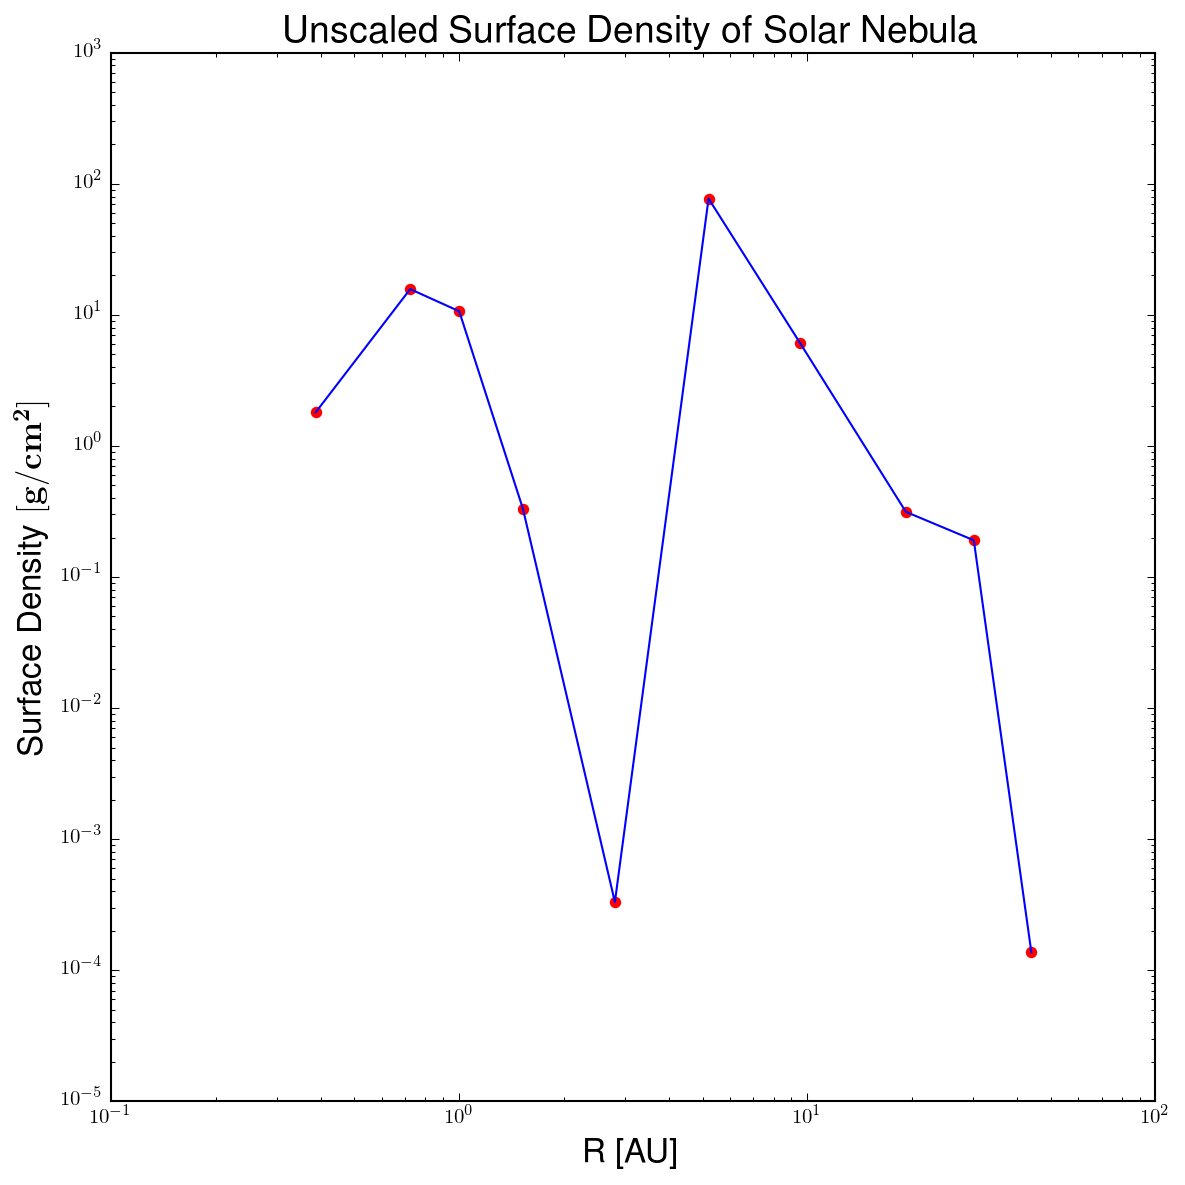

In [5]:
min_massses = [MM_mercury,MM_venus,MM_earth,MM_mars,MM_asteriod,MM_jupiter,MM_saturn,MM_uranus,MM_neptune,abs(MM_kuiperbelt)]
semimajor_axes = [SA_mercury,SA_venus,SA_earth,SA_mars,SA_asteroidbelt,SA_jupiter,SA_saturn,SA_uranus,SA_neptune,SA_kuiperbelt]

plt.figure(figsize=(8,8),dpi=150,facecolor = 'white')

plt.loglog(semimajor_axes,min_massses)
plt.scatter(semimajor_axes,min_massses, color='red')

plt.ylabel(r'Surface Density $ \bf [g/cm^2]$', fontweight='bold', fontsize=16)
plt.xlabel("R [AU]", fontweight='bold', fontsize=16)
plt.title('Unscaled Surface Density of Solar Nebula ', fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()

**Answer:** 

The asteroid belt and the Kuiper Belt have extremely low surface densities in comparision to the planets. Jupiter also has the largest surface density in comparision to the other bodies.

--------------------------------------------------------------------------------------

2) The planets condensed from the nebula, but refractories (and volatiles beyond their snowlines) were separated from the gas, so the planets do not have the same composition as the nebula. This is evidenced by, e.g., the terrestrial planets being volatile-poor and the ice giants being gas-poor. To reconstruct the mass of the Solar Nebula based on the mass of the planets, we need to figure out what is the fraction of nebular mass that went into the planets.

a - Terrestrial planets: For the inner planets, take as proxy the amount of iron. The iron mass fraction in the Sun is 0.11% by mass. Mercury, Venus, the Earth, and Mars have, respectively, 62%, 35%, 38%, and 30% of their mass being Fe. How much mass in gas would you need to add to these planets to dilute the iron until Solar composition is reached? Add also the asteroid belt at 25% iron fraction.

In [6]:
mercury_fraction = (0.62/0.0011) #563.6
venus_fraction = (0.35/0.0011) #318.1
earth_fraction = (0.38/0.0011) #345.4
mars_fraction = (0.30/0.0011) #272.7
asteroidbelt_fraction = (0.25/0.0011) #227.2

**Answer:** 

Mercury would need 563.6 mass in gas, Venus would need 318.1 mass in gas, Earth would need 345.4 mass in gas, Mars would need 272.7 mass in gas, and the asteroid belt would need 227.2 mass in gas to dilute the iron to reach Solar composition.

--------------------------------------------------------------------------------------

b - Gas Giants: For the giant planets let us separate them in atmosphere (gas) and core (rocks and ices). The gas is H, He, and Ne, where the core is made of refractories (Fe/Si) and volatile ices (CNO). Take the core composition to be solar: O (1.04%), C (0.46%), Fe (0.11%), N (0.1%), and Si (0.06%). Let's then say that the iron fraction in the core is Fe/(CNO + FeSi) = 6%.

Considering that the core of Saturn has 30 Earth masses, and that Jupiter had originally a similarly massive core (we cannot pinpoint the mass of Jupiter's core and it may have eroded...), how much more atmosphere would they need to have to reach Solar composition?

In [7]:
jupiter_fraction = ((0.06)*(30*M_earth))/(M_jupiter*0.0011) #5.16
saturn_fraction = ((0.06)*(30*M_earth))/(M_saturn*0.0011) #17.2

**Answer:**

Jupiter and Saturn would need 5.16 and 17.2, respectively, more atmosphere in order to reach Solar composition.

--------------------------------------------------------------------------------------

c - Ice giants: Uranus and Neptune are mostly just the rock/icy cores, so assume they are 6% iron. How much more atmosphere would they need to have to reach Solar composition? 
Add: Kuiper belt has ~10% Fe

In [8]:
uranus_fraction = (.06/0.0011) #54.5
neptune_fraction = (.06/0.0011) #54.5
kuiperbelt_fraction = (0.10/0.0011) #90.9

**Answer:**

Uranus, Neptune, and the Kuiper Belt would need 54.5, 54.5, and 90.9, respectively, in order to reach Solar composition.

--------------------------------------------------------------------------------------

3) Apply these correction to the surface density estimate of (1) and overplot. Does a trend arise?

In [10]:
# the scaled corrections are applied to the surface density estimate
scaled_MM_mercury,area_mercury = surface_density(mercury_fraction,M_mercury, SA_mercury, -SA_venus,SA_venus)
scaled_MM_venus,area_venus = surface_density(venus_fraction,M_venus, SA_venus, SA_mercury, SA_earth)
scaled_MM_earth,area_earth = surface_density(earth_fraction,M_earth, SA_earth, SA_venus, SA_mars)
scaled_MM_mars,area_mars = surface_density(mars_fraction,M_mars,SA_mars,SA_earth,SA_asteroidbelt)
scaled_MM_asteriod,area_asteroid = surface_density(asteroidbelt_fraction,M_asteroidbelt,SA_asteroidbelt, SA_mars, SA_jupiter)
scaled_MM_jupiter,area_jupiter = surface_density(jupiter_fraction,M_jupiter,SA_jupiter,SA_asteroidbelt,SA_saturn)
scaled_MM_saturn,area_saturn = surface_density(saturn_fraction,M_saturn,SA_saturn,SA_jupiter,SA_uranus)
scaled_MM_uranus,area_uranus = surface_density(uranus_fraction,M_uranus,SA_uranus,SA_saturn, SA_neptune)
scaled_MM_neptune,area_neptune = surface_density(neptune_fraction,M_neptune,SA_neptune,SA_uranus,SA_kuiperbelt)
scaled_MM_kuiperbelt,area_kuiperbelt = surface_density(kuiperbelt_fraction,M_kuiperbelt, SA_kuiperbelt, -SA_neptune, SA_neptune)

In [13]:
def surface_density(distance):
    '''This is the surface density equation for the minimum mass solar nebula (MMSN) given in the
    Class3 notes.
    
    Input:
    distance = semimajor axis of a given body
    
    Output:
    surface_density = returns the surface density for a given distance from the Sun (g/cm^2)'''
    
    surface_density = (1.7*10**3)*(distance)**(-3/2) #g/cm^2
    return surface_density

surface_density_values = surface_density(np.asarray(semimajor_axes))

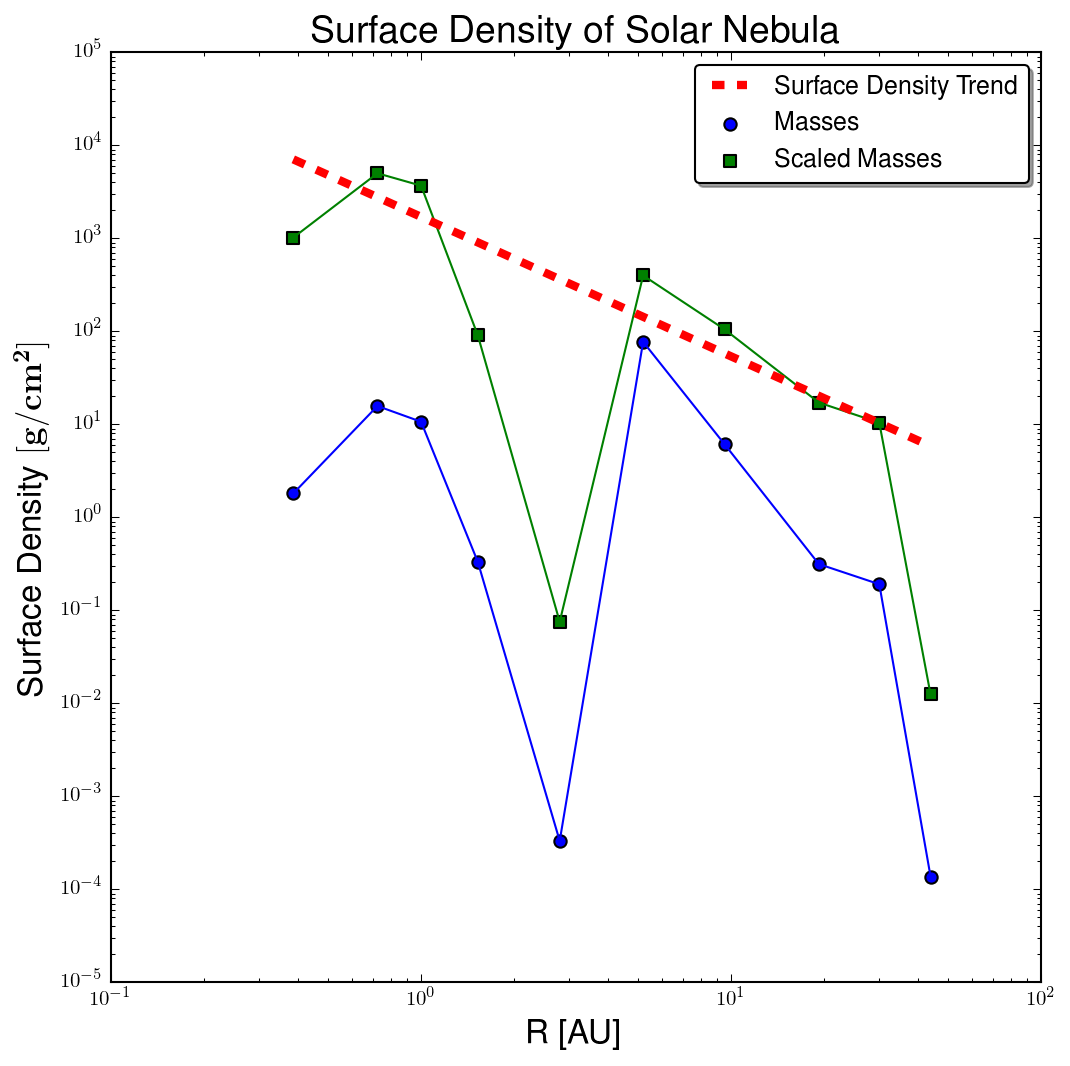

In [14]:
scaled_min_massses = [scaled_MM_mercury,scaled_MM_venus,scaled_MM_earth,scaled_MM_mars,scaled_MM_asteriod,scaled_MM_jupiter,scaled_MM_saturn,scaled_MM_uranus,scaled_MM_neptune,abs(scaled_MM_kuiperbelt)]
semimajor_axes = [SA_mercury,SA_venus,SA_earth,SA_mars,SA_asteroidbelt,SA_jupiter,SA_saturn,SA_uranus,SA_neptune,SA_kuiperbelt]
min_massses = [MM_mercury,MM_venus,MM_earth,MM_mars,MM_asteriod,MM_jupiter,MM_saturn,MM_uranus,MM_neptune,abs(MM_kuiperbelt)]

    
plt.figure(figsize=(8,8),dpi=150,facecolor = 'white')

# unscaled masses
plt.loglog(semimajor_axes,min_massses)
plt.scatter(semimajor_axes,min_massses,s=35.,label='Masses')

# scaled masses
plt.loglog(semimajor_axes,scaled_min_massses)
plt.scatter(semimajor_axes,scaled_min_massses,marker='s',s=30.,c='green',label='Scaled Masses')

#trend
plt.plot(semimajor_axes,surface_density_values,linestyle='--',linewidth=4,label='Surface Density Trend')


plt.legend(shadow=True,fancybox=True,scatterpoints = 1)

plt.ylabel(r'Surface Density $ \bf [g/cm^2]$', fontweight='bold', fontsize=16)
plt.xlabel("R [AU]", fontweight='bold', fontsize=16)
plt.title('Surface Density of Solar Nebula ', fontweight='bold', fontsize=18)
plt.show()

**Answer:**

The scaled masses all have a larger overall surface density than the bodies that were not scaled. The red dashed line represents the surface density trend that we saw in class, which is surface_density = (1.7*10^3)*(distance)^(-3/2) g/cm^2. As can be seen, 6/10 of the bodies plotted with their respective scaled masses are really close to that surface density trend; however, others have a lower surface density than that line. Venus, Earth,Jupiter, and Saturn are all slightly above that trend line. The asteroid belt and the Kuiper Belt have smaller surface densities than any of the other bodies.

--------------------------------------------------------------------------------------

4) By how much mass would you need to increase the mass of Mercury, Mars, and asteroid belt, and the Kuiper belt, respectively, to fit the trend?


In [17]:
def find_additional_mass(surface_density,area,current_mass):
    '''Function to calculate how much additional mass would be needed for certain bodies
    to fit the surface density trend see in the surface_density function.
    
    Input:
    surface density = the surface density derived from the trend (g/cm^2)
    area = the area from the surface density function (cm^2)
    current_mass = the current scale mass (g)
    
    Output:
    additional_mass = the additional mass needed to make the bodies fit the trend.'''
    
    mass_needed_from_trend = surface_density*area
    additional_mass = mass_needed_from_trend - current_mass*area
    return additional_mass

In [18]:
mercury_additional_mass = find_additional_mass(surface_density_values[0],area_mercury,scaled_MM_mercury)
mars_additional_mass = find_additional_mass(surface_density_values[3],area_mars,scaled_MM_mars)
asteroidbelt_additional_mass = find_additional_mass(surface_density_values[4],area_asteroid,scaled_MM_asteriod)
kuiperbelt_additional_mass = find_additional_mass(surface_density_values[-1],abs(area_kuiperbelt),abs(scaled_MM_kuiperbelt))

**Answer:**

By fixing the area of these given bodies, Mercury would need an additional mass of 2.59e+30 g, Mars would need an additional 1.56e+30 g, the asteroid belt would need an additional 2.62e+30 g, and the Kuiper Belt would need an additional 5e+30 g to fit the trend.

--------------------------------------------------------------------------------------